In [6]:
'''Train a simple deep CNN on the CIFAR10 small images dataset.

GPU run command with Theano backend (with TensorFlow, the GPU is automatically used):
    THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatx=float32 python cifar10_cnn.py

It gets down to 0.65 test logloss in 25 epochs, and down to 0.55 after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

batch_size = 32
num_classes = 10
epochs = 25
data_augmentation = True

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history_relu = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test))
    
    score = model.evaluate(x_test, y_test,
                            batch_size=batch_size, verbose=1)


print('RELU model results')
print('Test score:', score[0])
print('Test accuracy:', score[1])



x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/25
1562/1562 [==============================] - 13s - loss: 1.8525 - acc: 0.3162 - val_loss: 1.6227 - val_acc: 0.4243
Epoch 2/25
1562/1562 [==============================] - 13s - loss: 1.5560 - acc: 0.4312 - val_loss: 1.3568 - val_acc: 0.5074
Epoch 3/25
1562/1562 [==============================] - 13s - loss: 1.4304 - acc: 0.4825 - val_loss: 1.2408 - val_acc: 0.5631
Epoch 4/25
1562/1562 [==============================] - 13s - loss: 1.3352 - acc: 0.5224 - val_loss: 1.1747 - val_acc: 0.5821
Epoch 5/25
1562/1562 [==============================] - 12s - loss: 1.2690 - acc: 0.5476 - val_loss: 1.0974 - val_acc: 0.6127
Epoch 6/25
1562/1562 [==============================] - 13s - loss: 1.2014 - acc: 0.5734 - val_loss: 1.0403 - val_acc: 0.6357
Epoch 7/25
1562/1562 [==============================] - 12s - loss: 1.1537 - acc: 0.5928 - val_loss: 0.9924 - val_acc: 0.6555
Epoch 8/25

NameError: name 'plot' is not defined

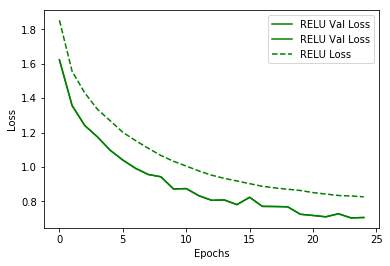

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), history_relu.history[
         'val_loss'], 'g-', label='RELU Val Loss')
plt.plot(range(epochs), history_relu.history[
         'loss'], 'g--', label='RELU Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
'''Train a simple deep SELU based CNN on the CIFAR10 small images dataset.

GPU run command with Theano backend (with TensorFlow, the GPU is automatically used):
    THEANO_FLAGS=mode=FAST_RUN,device=gpu,floatx=float32 python cifar10_cnn.py

It gets down to 0.65 test logloss in 25 epochs, and down to 0.55 after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.noise import AlphaDropout
from keras.layers import Conv2D, MaxPooling2D

batch_size = 32
num_classes = 10
epochs = 25
data_augmentation = True

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, kernel_initializer='lecun_normal'))
model2.add(Activation('selu'))
model2.add(AlphaDropout(0.1))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    
    
    history_selu = model2.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test))
    
    score = model2.evaluate(x_test, y_test,
                            batch_size=batch_size, verbose=1)


print('SELU model results')
print('Test score:', score[0])
print('Test accuracy:', score[1])


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/25
1562/1562 [==============================] - 14s - loss: 1.8846 - acc: 0.3119 - val_loss: 1.5599 - val_acc: 0.4404
Epoch 2/25
1562/1562 [==============================] - 13s - loss: 1.5670 - acc: 0.4267 - val_loss: 1.4152 - val_acc: 0.5019
Epoch 3/25
1562/1562 [==============================] - 13s - loss: 1.4511 - acc: 0.4750 - val_loss: 1.3521 - val_acc: 0.5259
Epoch 4/25
1562/1562 [==============================] - 13s - loss: 1.3591 - acc: 0.5122 - val_loss: 1.2094 - val_acc: 0.5768
Epoch 5/25
1562/1562 [==============================] - 13s - loss: 1.2880 - acc: 0.5391 - val_loss: 1.1285 - val_acc: 0.6054
Epoch 6/25
1562/1562 [==============================] - 12s - loss: 1.2255 - acc: 0.5611 - val_loss: 1.0411 - val_acc: 0.6358
Epoch 7/25
1562/1562 [==============================] - 13s - loss: 1.1768 - acc: 0.5825 - val_loss: 1.0616 - val_acc: 0.6336
Epoch 8/25

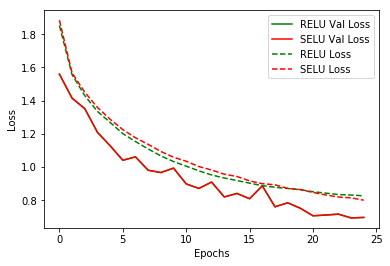

In [16]:
plt.plot(range(epochs), history_selu.history[
         'val_loss'], 'g-', label='RELU Val Loss')
plt.plot(range(epochs), history_selu.history[
         'val_loss'], 'r-', label='SELU Val Loss')
plt.plot(range(epochs), history_relu.history[
         'loss'], 'g--', label='RELU Loss')
plt.plot(range(epochs), history_selu.history[
         'loss'], 'r--', label='SELU Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()